In [1]:
import numpy as np
from numpy import random
from random import randint
import pickle
import pandas as pd

from mandelbrot import Monte_carlo_sampling, Latin_hypercube_sampling, \
    Orthogonal_Latin_hypercube_sampling, is_in

In [20]:
x = pd.read_csv('test_i.csv')

In [60]:
x.s_method.describe()

count     1800
unique       3
top         MC
freq       600
Name: s_method, dtype: object

In [25]:
x[x['repetition'] == 5].head(5)

,iteration,area,repetition,s_method
720,1,9.903557,5,MC
721,2,4.926017,5,MC
722,3,3.213221,5,MC
723,4,2.584902,5,MC
724,5,2.192832,5,MC


In [11]:
x = 4 * random.random_sample(size=10) - 2  # scale from [0, 1] to [-2, 2]
y = 4 * random.random_sample(size=10) - 2  # scale from [0, 1] to [-2, 2]

c_array = x + 1j * y
c_array

array([-1.87585409-1.36841497j, -0.45691529+0.39431297j,
        0.4418129 +0.17200238j, -0.90628484+0.03746381j,
        0.29902045-0.09739553j, -1.95526349-1.29811847j,
        0.11866567-1.43762509j,  0.14496247+1.25166452j,
        1.40141849+0.36885885j, -0.69780894+0.07874112j])

In [46]:
num = 1000
n_samples = num**2

M = np.arange(start=0, stop=n_samples, step=1, dtype=int).reshape((num, num))

In [47]:
%%time
rng = np.random.default_rng()
x_list = rng.permuted(M, axis=1)
print('done')

done
CPU times: total: 0 ns
Wall time: 20.7 ms


In [50]:
from random import shuffle

In [51]:
%%time
for i in range(len(M)):
    shuffle(M)
print('done')

done
CPU times: total: 438 ms
Wall time: 1.17 s


In [117]:
num = 3
x_list = np.array([[1,2,3], [4,5,6], [7,8,9]])
scales = 0.2

random.seed(42)
x = -2 + scales * (x_list.flatten() + random.random_sample(size=num**2))
x

array([-1.72509198, -1.40985714, -1.25360121, -1.0802683 , -0.96879627,
       -0.7688011 , -0.58838328, -0.22676477, -0.079777  ])

In [13]:
%%time
a = Orthogonal_Latin_hypercube_sampling(1000)
print('done')

done
CPU times: total: 46.9 ms
Wall time: 73.2 ms


In [14]:
%%time
a = Latin_hypercube_sampling(1000)
print('done')

done
CPU times: total: 93.8 ms
Wall time: 96.8 ms


In [15]:
%%time
a = Monte_carlo_sampling(1000)
print('done')

done
CPU times: total: 46.9 ms
Wall time: 61 ms


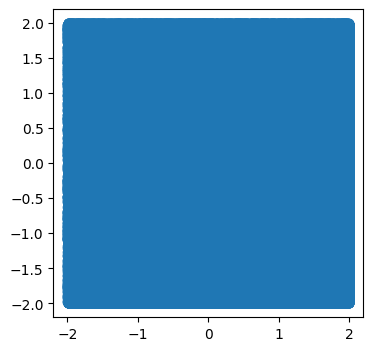

In [53]:
import matplotlib.pyplot as plt

a = Orthogonal_Latin_hypercube_sampling(1000)

# extract real part
x = [ele.real for ele in a]
# extract imaginary part
y = [ele.imag for ele in a]

plt.rcParams['figure.figsize'] = (4,4)
plt.scatter(x, y, marker='o')
plt.show()

array([0], dtype=int32)

In [5]:
np.array([1])/0 

C:\Users\wangk\AppData\Local\Temp\ipykernel_6248\1245235475.py:1: RuntimeWarning: divide by zero encountered in divide
  np.array([1])/0


array([inf])